# Lead Score Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

#### 1. Dataset preprocessing

In [1]:
#lets import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#supress the warning
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#lets import Dataset.
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#lets check the columns.
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [4]:
#lets check shape.
df.shape

(9240, 37)

In [5]:
#lets Check the info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#lets get the statictical analysis.
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#lets convert all the values into lower case.
df = df.applymap(lambda s:s.lower() if type(s)== str else s)

In [8]:
#lets Replace the Select with NaN.
df = df.replace('select',np.nan)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [9]:
#lets Check for percentage of null Values.
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#lets check the columns.
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [11]:
#lets drop all the columns with more than 36% of missing values.
df.drop(['Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score','Lead Quality','How did you hear about X Education','Tags'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
#lets Check for percentage of null Values.
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
df["Specialization"] = df["Specialization"].fillna('not provided')
df["What is your current occupation"] = df["What is your current occupation"].fillna('not provided')
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].fillna('not provided')
df["Country"] = df["Country"].fillna('not provided')

In [14]:
#lets Check for percentage of null Values.
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [15]:
df["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
france                     6
oman                       6
unknown                    5
germany                    4
canada                     4
south africa               4
kuwait                     4
nigeria                    4
sweden                     3
philippines                2
italy                      2
china                      2
asia/pacific region        2
belgium                    2
ghana                      2
netherlands                2
uganda                     2
bangladesh                 2
russia                     1
switzerland                1
kenya                      1
indonesia                  1
malaysia                   1
vietnam       

In [16]:
def slots(x):
    category = ""
    if x == "india":
        category = 'india'
    elif x == "not provided":
        category = "not provided"
    else:
        category = "Aboard India"
    return category

df['Country'] = df.apply(lambda x:slots(x['Country']),axis=1)
df['Country'].value_counts()

india           6492
not provided    2461
Aboard India     287
Name: Country, dtype: int64

In [17]:
#lets Check for percentage of null Values.
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [18]:
#lets check the percent of loss if the null values are removed.
round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2)

1.48

In [19]:
df2 = df[df.isnull().sum(axis=1) <1]

In [20]:
#lets Code for checking number of rows left in precent.
round(100*(df2.shape[0]/df.shape[0]),2)

98.2

In [21]:
#lets Recheck the percentage of missing values.
round(100*(df2.isnull().sum()/len(df2.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [22]:
#lets check the unique values of each columns.
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [23]:
#lets drop the single unique valued columns.
df2.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [24]:
#lets Familiarize all the Categorical Values.
for column in df2:
    print(df[column].astype('category').value_counts())
    print('-------------------------------------------------------------------------------------------')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
-------------------------------------------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
-------------------------------------------------------------------------------------------
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
qu

In [25]:
#lets Remove the prospect ID as it is unique for everyone.
df2.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

#### 2. Exploratory Data Analysis

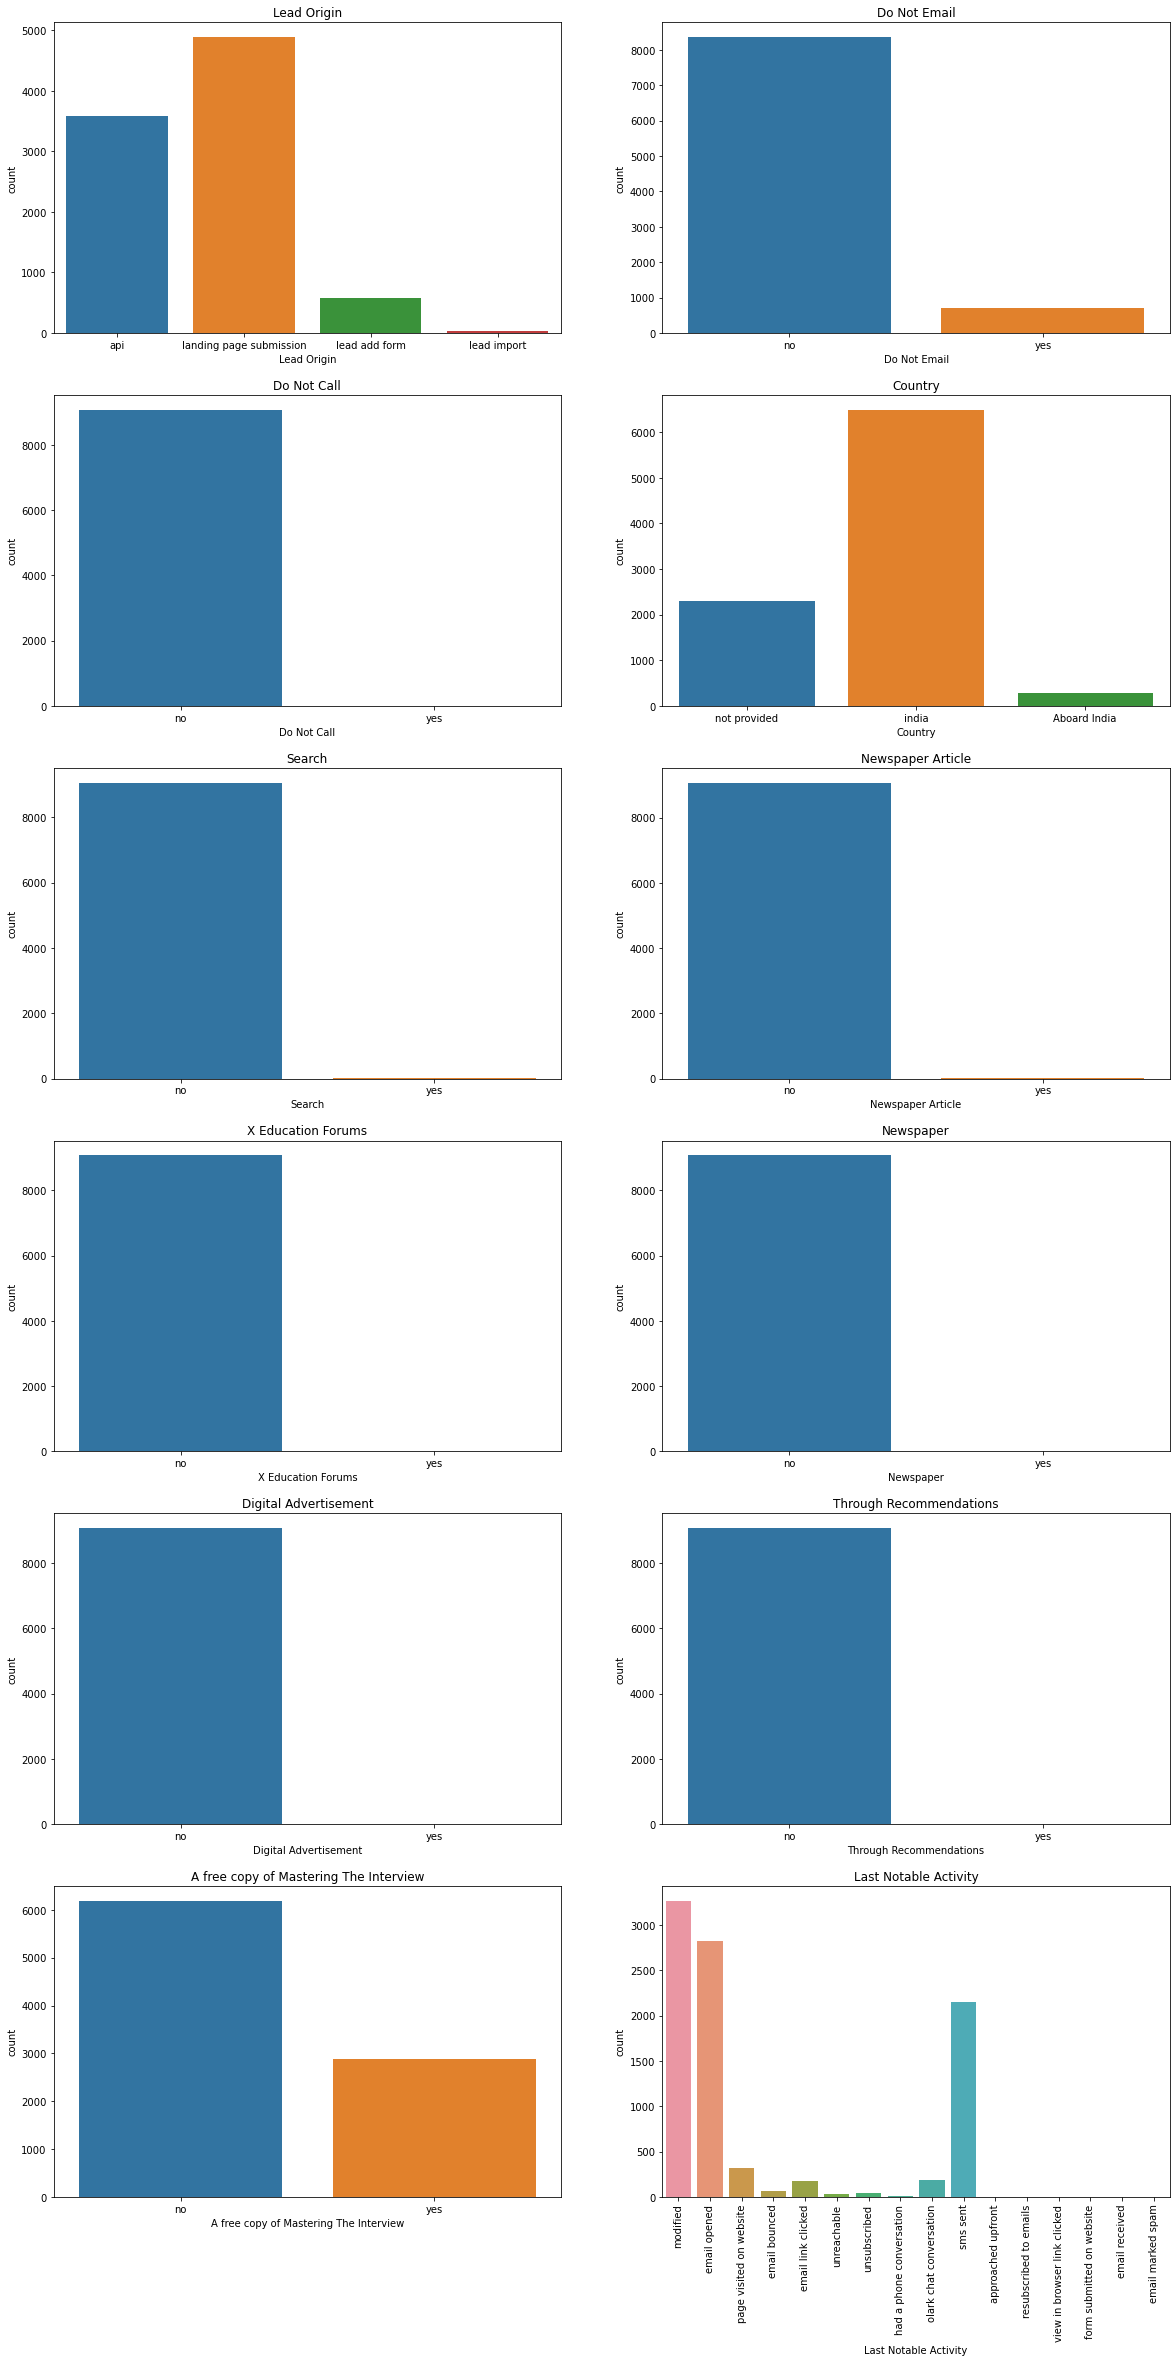

In [26]:
#lets Go for the Univariate Analysis For Categorical Variable by ploting Figure.
plt.figure(figsize=(20,40))

plt.subplot(6,2,1)
sns.countplot(df2['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df2['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df2['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df2['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df2['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df2['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df2['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df2['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df2['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df2['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df2['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df2['Last Notable Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')

plt.show()

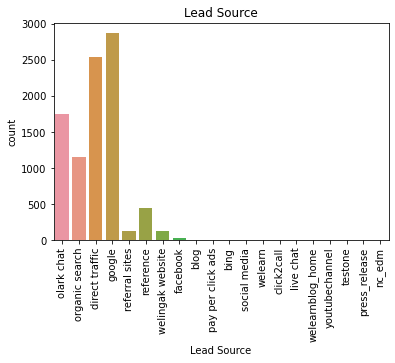

In [27]:
#lets plot the Lead Source with Count
sns.countplot(df2["Lead Source"]).tick_params(axis='x',rotation=90)
plt.title('Lead Source')
plt.show()

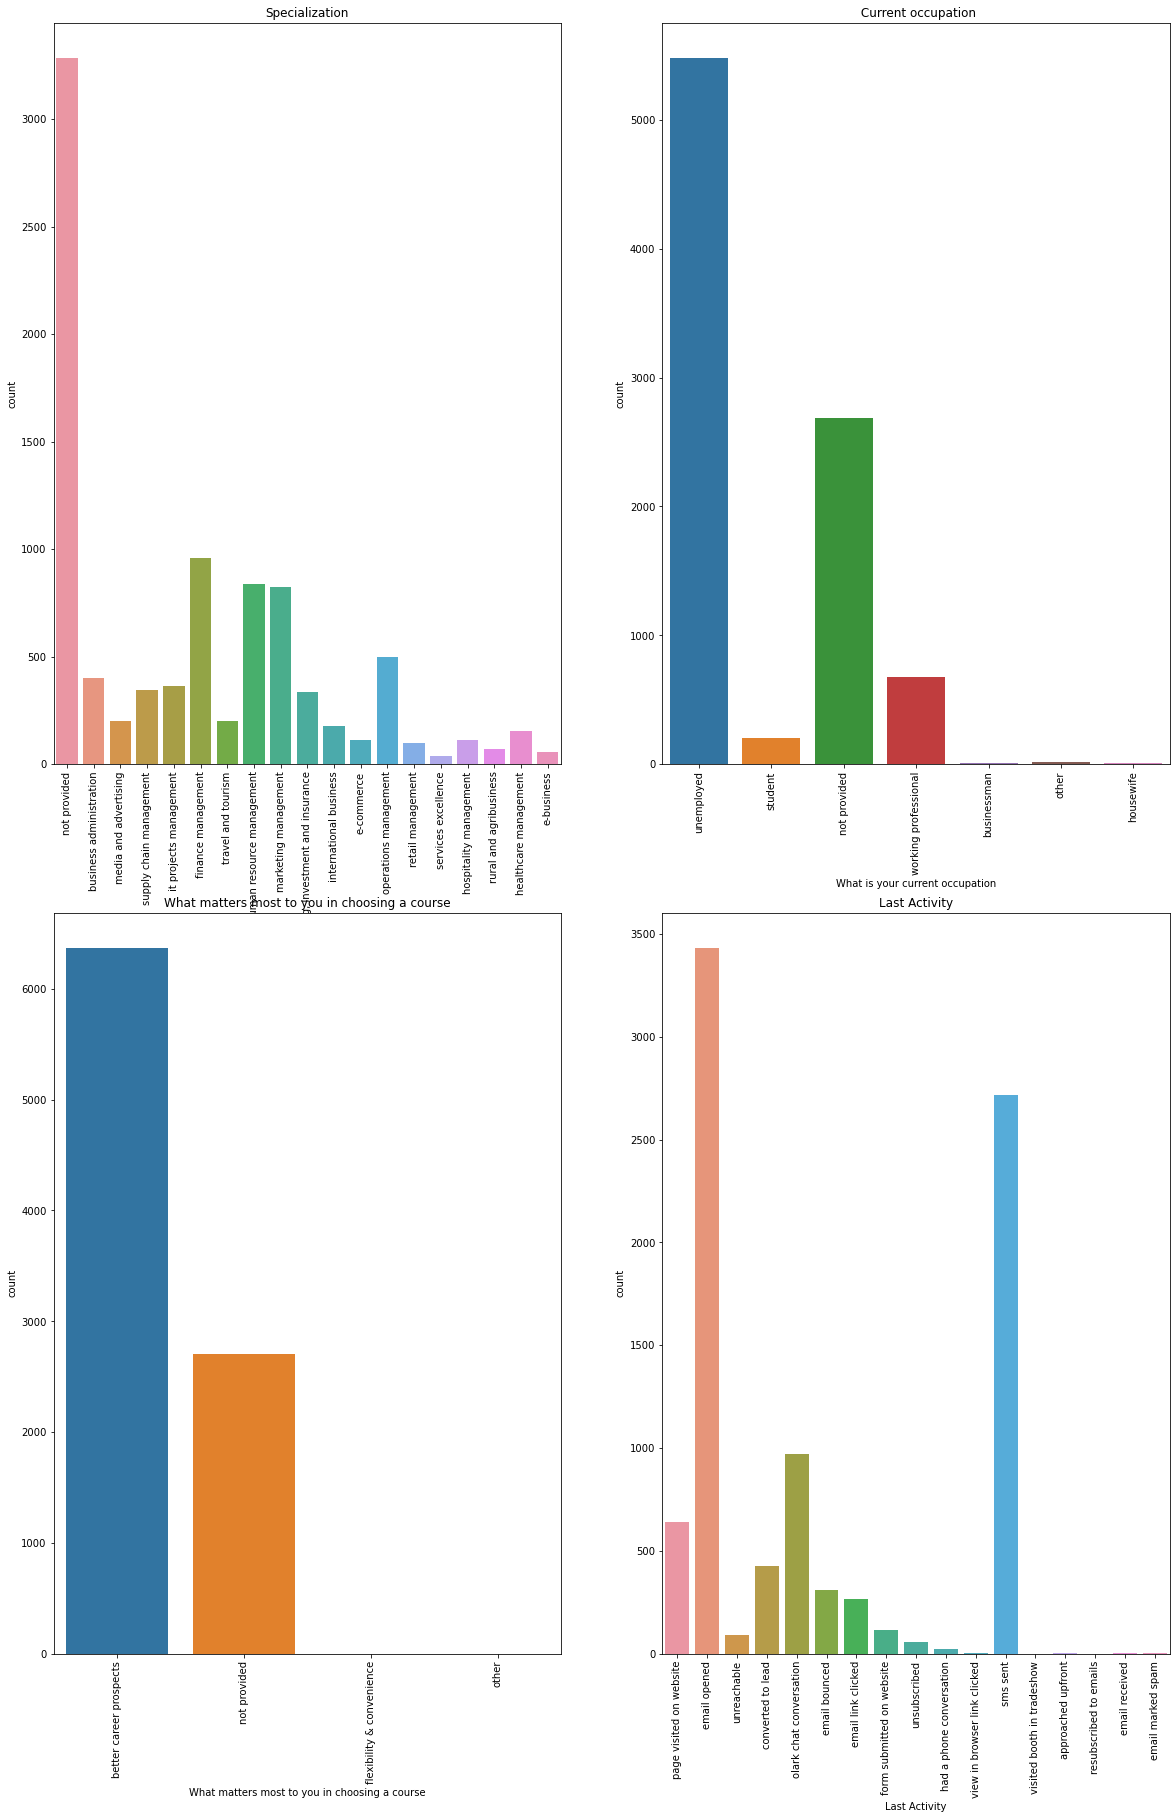

In [28]:
#lets plot  Columns  with multiple unique values.
plt.figure(figsize=(20,30))


plt.subplot(2,2,1)
sns.countplot(df2['Specialization']).tick_params(axis='x',rotation=90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(df2['What is your current occupation']).tick_params(axis='x',rotation=90)
plt.title(' Current occupation')

plt.subplot(2,2,3)
sns.countplot(df2['What matters most to you in choosing a course']).tick_params(axis='x',rotation=90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(df2['Last Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.show()

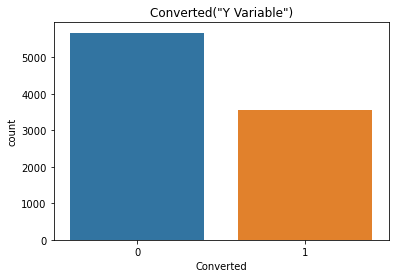

In [29]:
#lets plot Target Column which is Converted in our case.
sns.countplot(df['Converted'])
plt.title('Converted("Y Variable")')
plt.show()

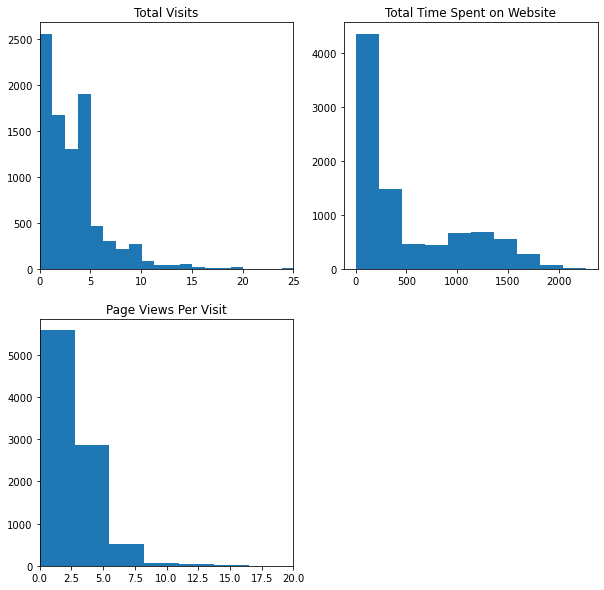

In [30]:
#lets Go for the Univariate Analysis For Numerical Variable by ploting Figure.
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.hist(df2['TotalVisits'],bins=200)
plt.title("Total Visits")
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(df2['Total Time Spent on Website'],bins=10)
plt.title("Total Time Spent on Website")


plt.subplot(2,2,3)
plt.hist(df2['Page Views Per Visit'],bins=20)
plt.title("Page Views Per Visit")
plt.xlim(0,20)
plt.show()


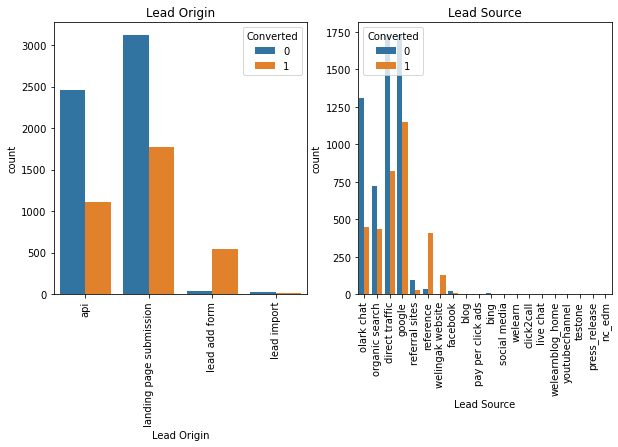

In [31]:
#lets plot lead Origin vs Lead Source.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Lead Source')
plt.show()

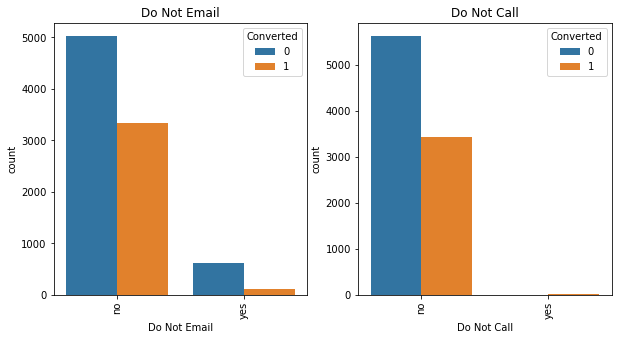

In [32]:
#lets plot Do not Email and Do not Call.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')
plt.show()

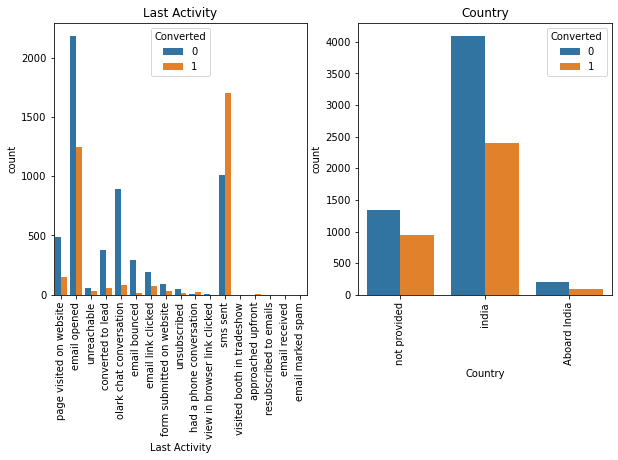

In [33]:
#lets plot last Acitvity and Country
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Country')
plt.show()

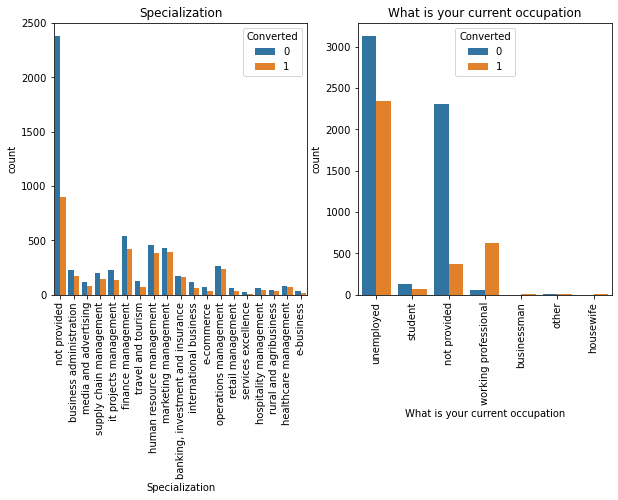

In [34]:
#lets plot Specialization and What is your current occupation.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('What is your current occupation')
plt.show()

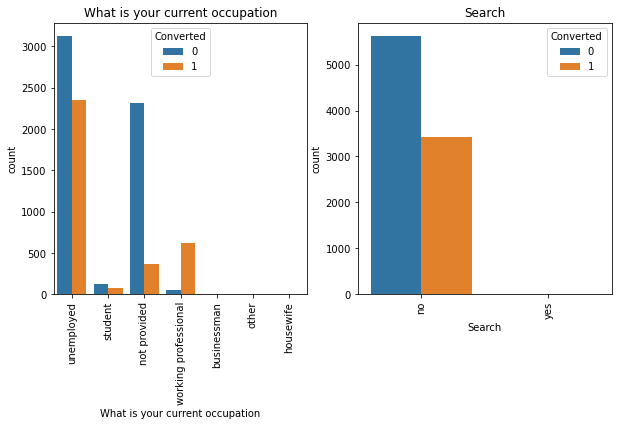

In [35]:
#lets plot What is your current occpation and Search.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('What is your current occupation')

plt.subplot(1,2,2)
sns.countplot(x='Search',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Search')
plt.show()

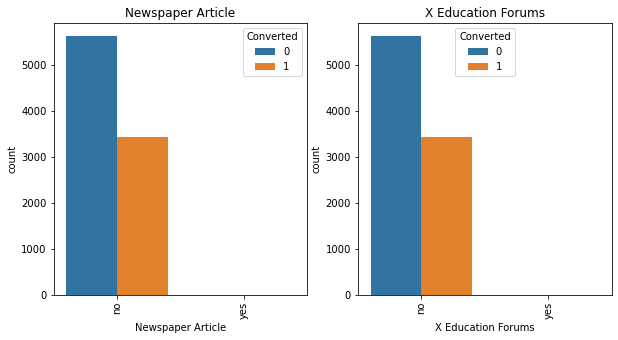

In [36]:
#lets plot Newspaper Article and X education.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('X Education Forums')
plt.show()

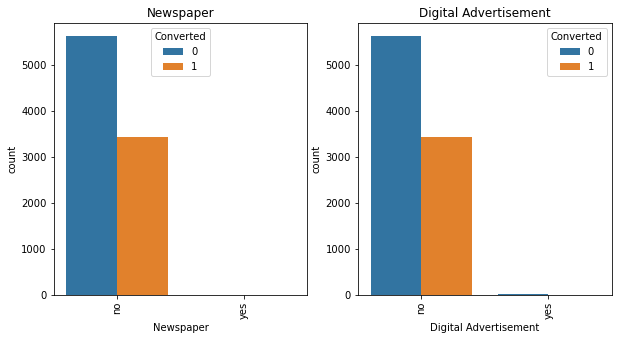

In [37]:
#lets plot Newspaper and Digital Advertisement.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Digital Advertisement')
plt.show()

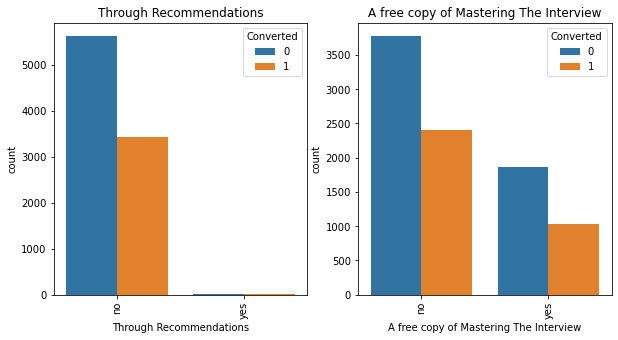

In [38]:
#lets plot Through Recommendation and A free Copy of Mastering the Interview.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('A free copy of Mastering The Interview')
plt.show()

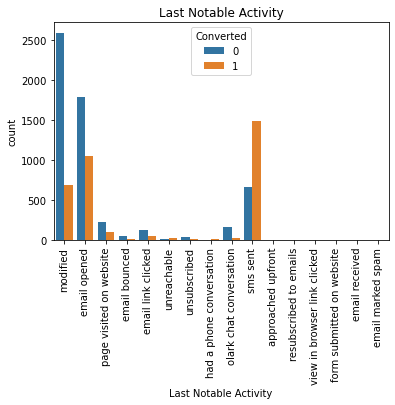

In [39]:
#lets plot the Last Notable Activity.
sns.countplot(x='Last Notable Activity',hue='Converted',data=df2).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')
plt.show()

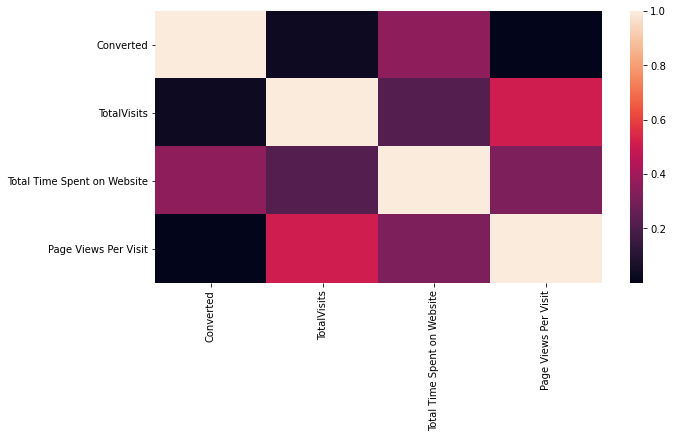

In [40]:
#Lets check the Correlation among variables.
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr())
plt.show()

In [41]:
#lets Check the Stastical analysis of numeric columns.
numeric = df2[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


#### 3.Dummy Variables

In [42]:
#lets check the unique values of each columns.
df2.nunique()

Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

In [43]:
df2.loc[:,df2.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
#lets Create the Dummy Variable using the "get_dummies"
dummy = pd.get_dummies(df2[['Lead Origin', 'Lead Source', 'Do Not Email', 
       'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

# Add the Results to the Master Dataframe
df2 = pd.concat([df2,dummy],axis=1)
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0


In [45]:
#lets Drop the Columns whose Dummy is been created and other columns not required.
df2 = df2.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization','Specialization_not provided',
       'What is your current occupation','What is your current occupation_not provided',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],1)
df2.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### 4.Train-Test Split

In [46]:
#lets import the required library.
from sklearn.model_selection import train_test_split 

In [47]:
#lets put the target variable in y.
y = df2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
#lets get the variable on y axis.
x = df2.drop(['Converted'],1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
#lets Split the Datasets into 70% and 30% for the Training and Test Dataset respectively.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=10)

In [50]:
#Lets Do MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

#lets Scale the numerical values.
scaler = MinMaxScaler()
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


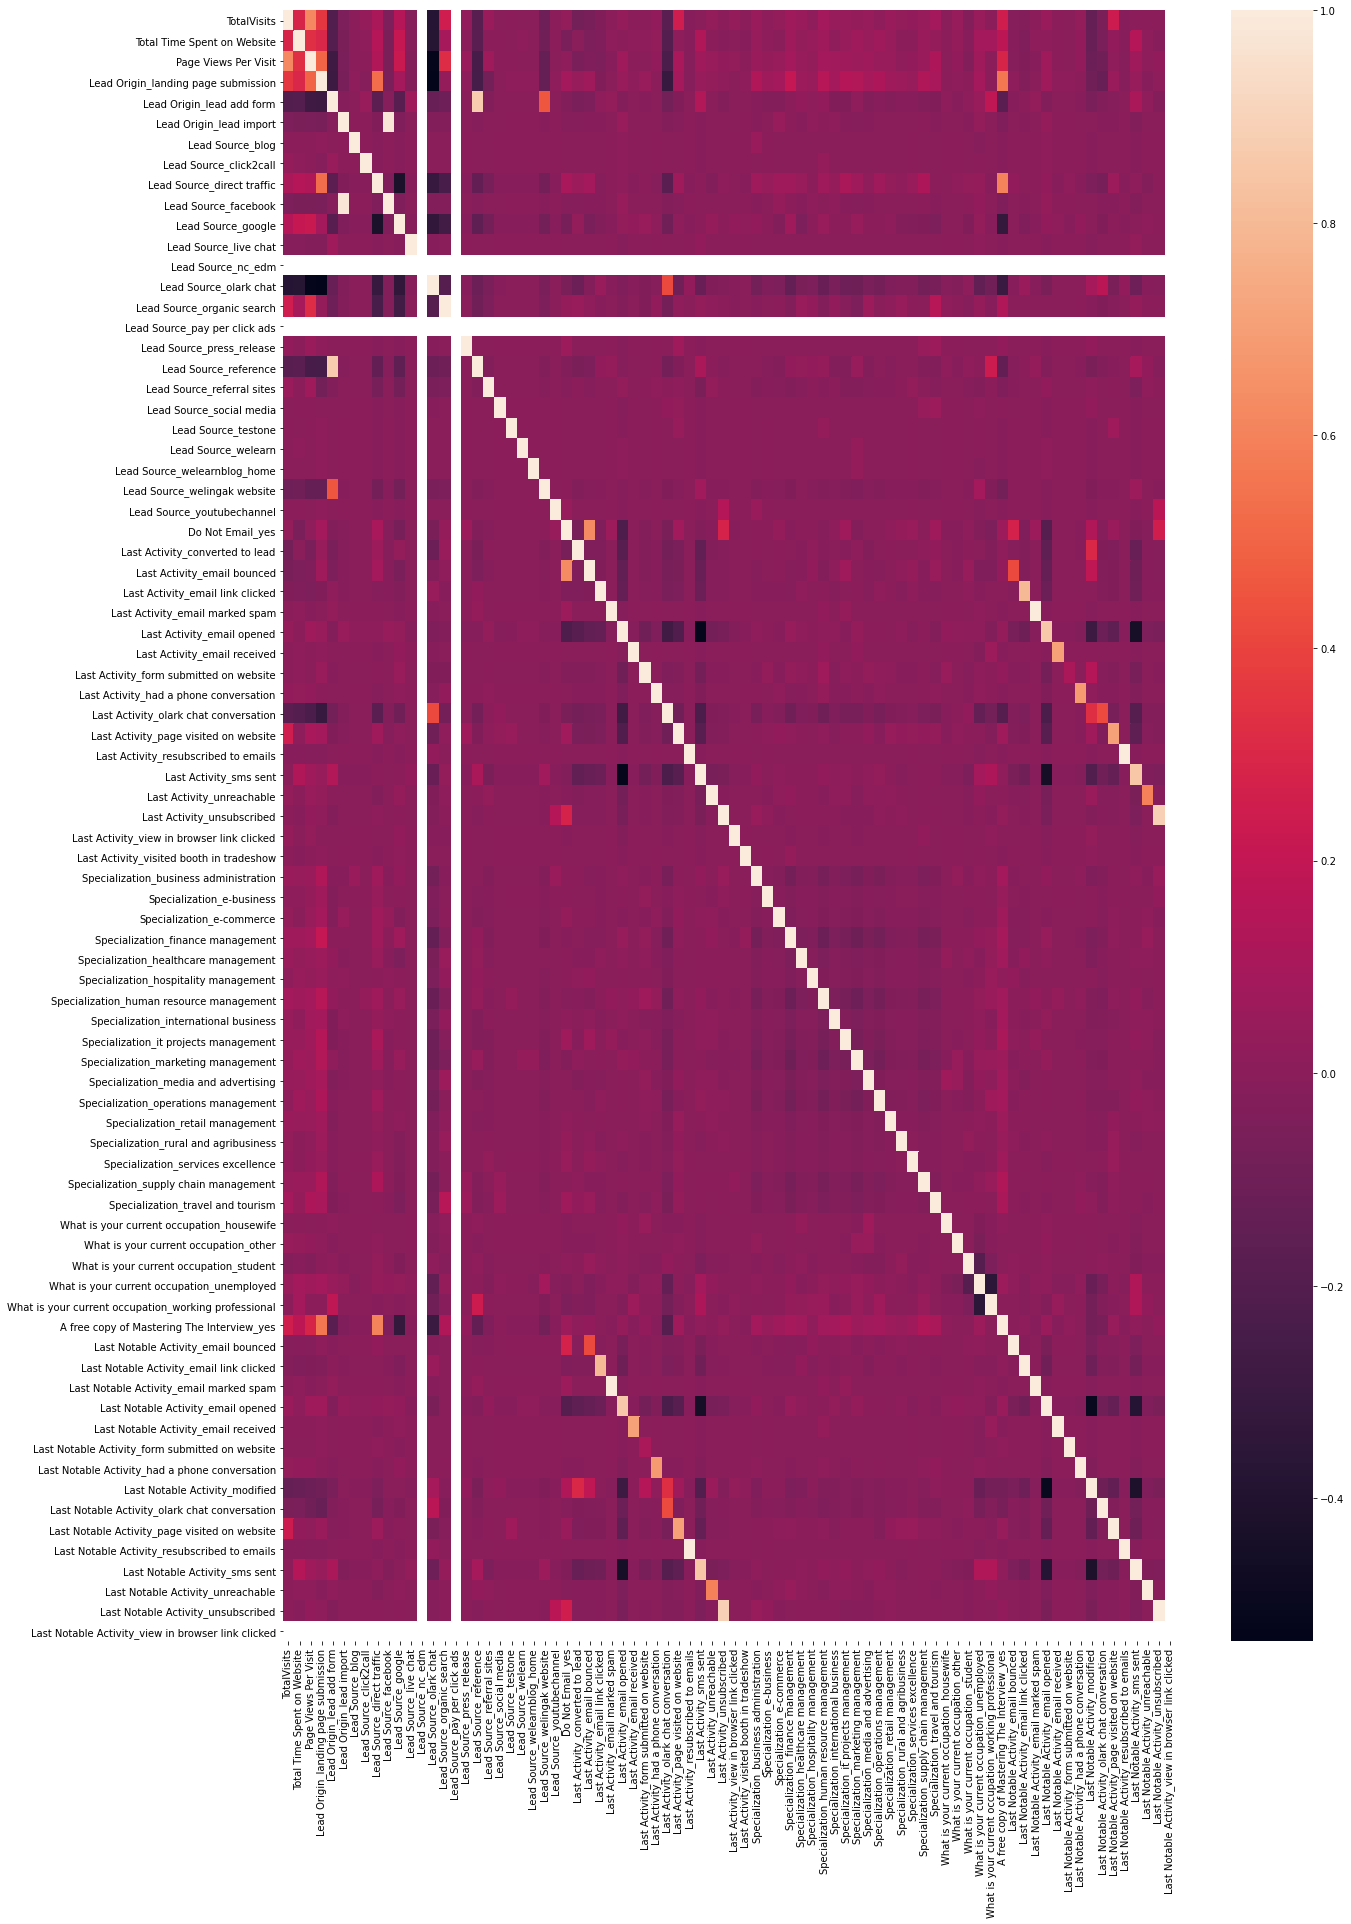

In [51]:
#lets Check the Correlation feature among the variable.
plt.figure(figsize=(20,30))
sns.heatmap(x_train.corr())
plt.show()

#### 5. Model Building

In [52]:
#lets import the 'LogisticRegression'.(
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
#lets Import RFE.
from sklearn.feature_selection import RFE

In [54]:
#Lets Running RFE with 15 variable as ouput.
rfe = RFE(logreg, 15)
rfe = rfe.fit(x_train, y_train)

In [55]:
#lets Features that have been selected by RFE.
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Lead Source_blog', False, 43),
 ('Lead Source_click2call', False, 62),
 ('Lead Source_direct traffic', False, 14),
 ('Lead Source_facebook', False, 41),
 ('Lead Source_google', False, 16),
 ('Lead Source_live chat', False, 49),
 ('Lead Source_nc_edm', False, 64),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 15),
 ('Lead Source_pay per click ads', False, 65),
 ('Lead Source_press_release', False, 52),
 ('Lead Source_reference', False, 3),
 ('Lead Source_referral sites', False, 17),
 ('Lead Source_social media', False, 20),
 ('Lead Source_testone', False, 44),
 ('Lead Source_welearn', False, 46),
 ('Lead Source_welearnblog_home', False, 47),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel',

In [56]:
#lets put all the columns Selected by RFE in variable 'Col'.
col = x_train.columns[rfe.support_] 

In [57]:
#Lets Select the columns Selected by RFE.
x_train = x_train[col]

In [58]:
#lets import the model building libraries.
import statsmodels.api as sm

In [59]:
#lets Build the first Statsmodels
x_train_sm = sm.add_constant(x_train)
logm1 = sm.GLM(y_train, x_train_sm, sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Tue, 10 Aug 2021   Deviance:                       5270.1
Time:                        21:46:48   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [60]:
#lets import "variance_inflation_factor"
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
#lets Make a VIF Dataframe for all the variables present.
vif  = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


In [62]:
#lets drop "What is your current occupation_housewife" feature because of it High p-value 0.999.
x_train.drop("What is your current occupation_housewife",axis=1,inplace=True)

In [63]:
#lets Build the Secound Statsmodels.
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_sm, sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.6
Date:                Tue, 10 Aug 2021   Deviance:                       5287.1
Time:                        21:46:50   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4578      0.113    -30.612      0.000      -3.679      -3.236
TotalVisits                                              5.3758      1.432      3.754      0.000       2.569       8.182
Total Time Spent on Website                              4.6191      0.167     27.704      0.000       4.292       4.946
Lead Origin_lead add form                                3.7559      0.225     16.676      0.000       3.314       4.197
Lead Source_olark chat                                   1.5845      0.111     14.225      0.000       1.366       1.803
Lead Source_welingak website                             2.5819      1.033      2.500      0.012       0.557       4.606
Do Not Email_yes                                        -1.4311      0.170     -8.405      0.000      -1.765      -1.097
Last Activity_olark chat conversation                   -1.3930      0.167     -8.320      0.000      -1.721      -1.065
Last Activity_sms sent                                   1.2752      0.074     17.249      0.000       1.130       1.420
What is your current occupation_other                    2.1635      0.755      2.865      0.004       0.684       3.644
What is your current occupation_student                  1.2472      0.227      5.506      0.000       0.803       1.691
What is your current occupation_unemployed               1.1579      0.086     13.509      0.000       0.990       1.326
What is your current occupation_working professional     3.6818      0.204     18.007      0.000       3.281       4.083
Last Notable Activity_had a phone conversation          23.0067   1.32e+04      0.002      0.999   -2.58e+04    2.58e+04
Last Notable Activity_unreachable                        1.8246      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [64]:
#lets Make a VIF Dataframe for all the variables present.
vif  = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
11,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


In [65]:
#lets drop "Last Notable Activity_had a phone conversation" feature because of it High p-value 0.999.
x_train.drop("Last Notable Activity_had a phone conversation",axis=1,inplace=True)

In [66]:
#lets Build the Third Statsmodels.
x_train_sm = sm.add_constant(x_train)
logm3 = sm.GLM(y_train, x_train_sm, sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Tue, 10 Aug 2021   Deviance:                       5302.6
Time:                        21:46:50   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_lead add form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_olark chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_welingak website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_olark chat conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_sms sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_working professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [67]:
#lets Make a VIF Dataframe for all the variables present.
vif  = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.53
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
11,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


#### 6.Creating Predication

In [68]:
#Lets Predict the Probabilites on the Train set.
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1289    0.647883
3604    0.133180
5584    0.232946
7679    0.133180
7563    0.495090
7978    0.777765
7780    0.167311
7863    0.982741
838     0.772980
708     0.149249
dtype: float64

In [69]:
#Lets Reshape into Array.
y_train_pred  = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ])

In [70]:
# Dataframe with given Conversion rate and probabilites of predicted ones.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.647883
1,0,0.133180
2,0,0.232946
3,0,0.133180
4,0,0.495090


In [71]:
#substituting 0 or 1 with the cut off as 0.5.
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.647883,1
1,0,0.133180,0
2,0,0.232946,0
3,0,0.133180,0
4,0,0.495090,0


#### 7.Model Evaluation

In [72]:
#lets  Importing metrics from the sklearn for evaluation.
from sklearn import metrics

In [73]:
#lets Creating Confusion matrix.
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [74]:
#Predicted    not_Chrun   Churn
#Actual 
#not_Chrun    3437        458
#Chrun         729       1727

In [75]:
# Check the overall accuracy 
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

In [76]:
# Substituting the value of true positive.
TP = confusion[1,1]
# Substituting the value of true negative.
TN = confusion[0,0]
# Substituting the value of false positive.
FP = confusion[0,1]
# Substituting the value of false negative.
FN = confusion[1,0]

In [77]:
# Calculating the sensitivity.
TP/(TP+FN)

0.6958469055374593

In [78]:
# Calculating the sensitivity.
TN/(TN+FP)

0.8824133504492939

- The Current cut off as 0.5 we have around 81% accuracy ,sensitivity of around 70% and specificity of around 87%..

#### 7.Optimise the Cut off (ROC Curve).


In [79]:
#ROC Function
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot( fpr, tpr, label='ROC_curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('Receiver opertaing characteristic example')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
               
    return None

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob,drop_intermediate = False)

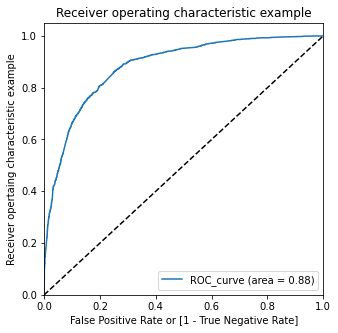

In [81]:
#lets call the function .
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The area under ROC curve is 0.88 which is good.

In [82]:
#lets Create the Columns with Different Possibility of Cutoffs.
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0


In [83]:
#lets Create the Dataframe to see the values of accuracy, sensitivity, and specificity at different values of Possibility of Cutoffs.
cutoff_df = pd.DataFrame(columns = ['Probabilty','accuracy','sensititvity','specificity'])
# Lets form a confusion matrix to find values of 'accuracy','sensititvity','specificity' for each  values of Possibility of Cutoffs.
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    Con_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(Con_mat))
    accuracy = (Con_mat[0,0]+Con_mat[1,1])/total
    specificity = Con_mat[0,0]/(Con_mat[0,0]+Con_mat[0,1])
    sensitivity = Con_mat[1,1]/(Con_mat[1,0]+Con_mat[1,1])
    cutoff_df.loc[i] = [i , accuracy, sensitivity, specificity]
cutoff_df

,Probabilty,accuracy,sensititvity,specificity
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577232,0.983306,0.321181
0.2,0.2,0.758306,0.912866,0.660847
0.3,0.3,0.788852,0.872557,0.736072
0.4,0.4,0.809321,0.765879,0.836714
0.5,0.5,0.810266,0.695847,0.882413
0.6,0.6,0.802708,0.627850,0.912965
0.7,0.7,0.773579,0.504072,0.943517
0.8,0.8,0.753582,0.413681,0.967908
0.9,0.9,0.706660,0.260179,0.988190


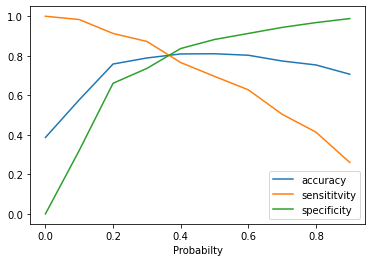

In [84]:
#lets plot the above results.
cutoff_df.plot.line(x='Probabilty', y=['accuracy','sensititvity','specificity'])
plt.show()

- From the graph it is visible that the optimal cut off is at 0.38

In [85]:
#lets Create the Final predicted column based upon the optimal cut off point.
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.38 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [86]:
#lets Check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8071169894504803

In [87]:
#lets Creating Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3213,  682],
       [ 543, 1913]], dtype=int64)

In [88]:
# Substituting the value of True positive
TP = confusion2[1,1]
# Substituting the value of True negative
TN = confusion2[0,0]
# Substituting the value of False positive
FP = confusion2[0,1]
# Substituting the value of False negative
FN = confusion2[1,0]

In [89]:
# Calculating the sensitivity
TP/(TP+FN)


0.7789087947882736

In [90]:
#Calculating the specificity
TN/(TN+FP)

0.8249037227214377

- The current cut off as 0.38 we have accuracy, sensitivity and specificity of around 80%.

#### 8.Prediction on Test Set

In [91]:
#Lets Do MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

#lets Scale the numerical values.
scaler = MinMaxScaler()
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
8308,0.019920,0.429089,0.090909,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7212,0.015936,0.001359,0.072727,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2085,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4048,0.015936,0.635251,0.036364,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4790,0.015936,0.005437,0.036364,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Subsituting all the columns in the final train model.
col = x_train.columns

In [93]:
# Substituting all the columns in the Final train model
x_test = x_test[col]
# ADD a Constant to x_test.
x_test_sm = sm.add_constant(x_test[col])
x_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.019920,0.429089,0,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.015936,0.001359,0,0,0,0,0,1,0,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,0,1,0,0
4048,1.0,0.015936,0.635251,0,0,0,0,0,1,0,0,1,0,0
4790,1.0,0.015936,0.005437,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0
8179,1.0,0.095618,0.153149,0,0,0,0,0,1,0,0,0,0,0
6236,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0
5240,1.0,0.043825,0.472134,0,0,0,0,0,1,0,0,1,0,0


In [94]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(x_test_sm)
# Converting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to DataFrame.
y_test_df = pd.DataFrame(y_test)
# Remove index for both  dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming Columns
y_pred_final = y_pred_final.rename(columns={0:'Conversion_Prob'})
y_pred_final

,Converted,Conversion_Prob
0,0,0.449215
1,1,0.830372
2,1,0.982741
3,1,0.879812
4,0,0.101856
...,...,...
2718,1,0.108386
2719,0,0.278713
2720,0,0.133180
2721,1,0.801246


In [95]:
#Making prediction using cut off 0.38
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.449215,1
1,1,0.830372,1
2,1,0.982741,1
3,1,0.879812,1
4,0,0.101856,0
...,...,...,...
2718,1,0.108386,0
2719,0,0.278713,0
2720,0,0.133180,0
2721,1,0.801246,1


In [96]:
#check the overall accuracy
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final.final_predicted)

0.8152772677194271

In [97]:
#lets Create the Confusion Matirx column.
confusion2 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final.final_predicted)
confusion2

array([[1454,  290],
       [ 213,  766]], dtype=int64)

In [98]:
# Substituting the value of True positive
TP = confusion2[1,1]
# Substituting the value of True negative
TN = confusion2[0,0]
# Substituting the value of False positive
FP = confusion2[0,1]
# Substituting the value of False negative
FN = confusion2[1,0]

In [99]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7253787878787878

In [100]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7824310520939735

- The current cut off as 0.35 and accuracy, sensitivity and specificity of around 78%.

#### 9.Precision-Recall

In [101]:
#lets build the Confusion matrix for Precision-ReCall.
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion 

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [102]:
# Precision = TP / TP + FP.
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7886479003230272

In [103]:
# Recall = TP / TP + FN.
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958469055374593

- The Current cutoff as 0.38 we have Precision around 78% and Recall around 69.58%.

#### 9.1 Precision and Recall Tradeoff

In [104]:
#lets import Precision and Recall Tradeoff.
from sklearn.metrics import precision_recall_curve

In [105]:
#lets check something
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [106]:
#lets Get  precision, Recall and threshold values.
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

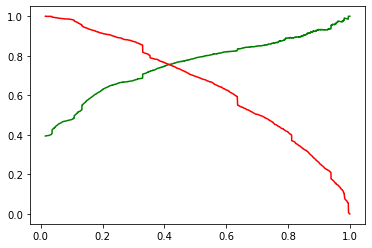

In [107]:
#lets plot all the above the Result.
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [108]:
#lets gets the Final Predicted Columns based upon optimal cutoff achived
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [109]:
# lets check the Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8093213667139033

In [110]:
# Creating confusion matrix again.
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3259,  636],
       [ 575, 1881]], dtype=int64)

In [111]:
# Substituting the value of True positive
TP = confusion2[1,1]
# Substituting the value of True negative
TN = confusion2[0,0]
# Substituting the value of False positive
FP = confusion2[0,1]
# Substituting the value of False negative
FN = confusion2[1,0]

In [112]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7473182359952324

In [113]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7658794788273615

- The Current cut off as 0.41 we have Precision around 74% and Recall around 76%.

#### 10.Prediction on Test Set.

In [114]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(x_test_sm)
# Converting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to DataFrame.
y_test_df = pd.DataFrame(y_test)
# Remove index for both  dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming Columns
y_pred_final = y_pred_final.rename(columns={0:'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.449215
1,1,0.830372
2,1,0.982741
3,1,0.879812
4,0,0.101856


In [115]:
# Lets Make prediction using cut-off  at 0.41.
y_pred_final["final_predicted"] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.449215,1
1,1,0.830372,1
2,1,0.982741,1
3,1,0.879812,1
4,0,0.101856,0


In [116]:
# Lets check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8093213667139033

In [117]:
#Lets Create the Confusion matrix.
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [118]:
confusion2

array([[3259,  636],
       [ 575, 1881]], dtype=int64)

In [119]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [120]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7473182359952324

In [121]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7658794788273615

- The current cut off as 0.41 gives precision around 74% and Recall around 76%

### Conclusion:-

The potential customers can Recogize by the below feature:-

- 1.The toatal time spent on the Website.
- 2.Total number of visits.
- 3.When the lead Score are from -:
                * google
                * Direct traffic
                * Organic Search
                * Welingak website
- 4.When the last activity are by SMS and Olark chat conversation.
- 5.When their current occupation is as a working professional.
- 6.When the lead origin is lead add format.


    